In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from bliss.encoders.detection import DetectionEncoder
from bliss.encoders.layers import ConcatBackgroundTransform

import matplotlib.pyplot as plt 
import torch
from astropy.table import Table
from bliss.datasets.table_utils import column_to_tensor

from bliss.datasets.table_utils import column_to_tensor
from astropy.table import Table
from bliss.datasets.lsst import get_default_lsst_psf, get_default_lsst_background
from bliss.datasets.background import add_noise_and_background


from einops import rearrange

# dataset
from bliss.datasets.galsim_blends import generate_dataset, SavedGalsimBlends, parse_dataset



In [ ]:
!echo $CUDA_VISIBLE_DEVICES

5


## Check dataset with stars

In [ ]:
catsim_table = Table.read("../../../data/OneDegSq.fits")
all_star_mags = column_to_tensor(Table.read("../../../data/stars_med_june2018.fits"), "i_ab")
psf = get_default_lsst_psf()

n_samples = 5000

dataset = generate_dataset(n_samples, catsim_table, all_star_mags, psf, max_n_sources=10, add_galaxies_in_padding=True, galaxy_density=100, star_density=100)

100%|██████████| 5000/5000 [04:12<00:00, 19.80it/s]


(array([9.400e+01, 7.060e+02, 1.840e+03, 2.180e+03, 2.057e+03, 1.982e+03,
        1.757e+03, 1.539e+03, 1.544e+03, 1.275e+03, 1.171e+03, 1.023e+03,
        7.860e+02, 6.440e+02, 4.840e+02, 3.820e+02, 3.400e+02, 2.270e+02,
        1.870e+02, 1.410e+02, 1.060e+02, 6.800e+01, 4.100e+01, 3.600e+01,
        1.500e+01, 2.200e+01, 9.000e+00, 6.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00]),
 array([ 1.79721344,  2.39981341,  3.00241327,  3.60501313,  4.20761299,
         4.81021309,  5.41281271,  6.01541281,  6.61801243,  7.22061253,
         7.82321215,  8.42581177,  9.02841187,  9.63101196, 10.23361206,
        10.83621216, 11.4388113 , 12.0414114 , 12.6440115 , 13.2466116 ,
        13.84921074, 14.45181084, 15.05441093, 15.65701103, 16.25961113,
        16.86221123, 17.46481133, 18.06740952, 18.67000961, 19.27260971,
        19.87520981, 20.47780991]),
 <BarContainer object of 31 artists>)

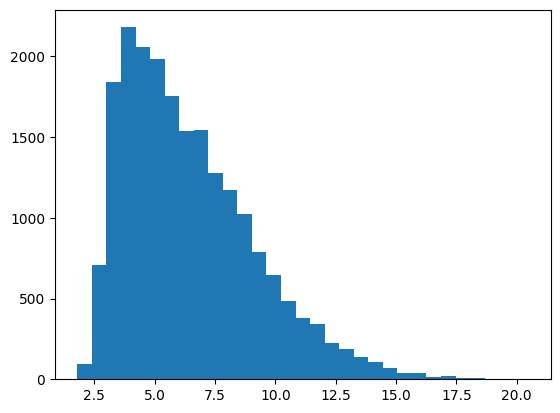

In [ ]:
dataset.keys()

dict_keys(['images', 'background', 'noiseless', 'individuals', 'star_fluxes', 'star_bools', 'fluxes', 'galaxy_params', 'n_sources', 'galaxy_bools', 'plocs'])

In [ ]:
gfluxes = dataset['galaxy_params'][:, :, -1].flatten()
gfluxes = gfluxes[gfluxes > 0 ]


sfluxes = dataset['star_fluxes'][:, :, 0].flatten()
sfluxes = sfluxes[sfluxes > 0 ]

gfluxes.shape, sfluxes.shape

(torch.Size([9041]), torch.Size([8855]))

(array([0.        , 0.        , 0.        , 0.00406714, 0.01111689,
        0.06100717, 0.14587492, 0.17244732, 0.18627522, 0.15753407,
        0.16295729, 0.15021321, 0.13665606, 0.13719865, 0.12065862,
        0.13150434, 0.09896718, 0.09923855, 0.09435775, 0.08242746,
        0.07103962, 0.06398988, 0.05178831, 0.04067145, 0.04175602,
        0.03714659, 0.02413172, 0.02413183, 0.01681086, 0.01653972,
        0.01491286]),
 array([ 6.99485016,  7.4194026 ,  7.84395552,  8.26850796,  8.69306087,
         9.11761284,  9.54216576,  9.96671867, 10.39127064, 10.81582355,
        11.24037647, 11.66492844, 12.08948135, 12.51403427, 12.93858624,
        13.36313915, 13.78769207, 14.21224499, 14.63679695, 15.06134987,
        15.48590279, 15.91045475, 16.33500671, 16.75955963, 17.18411255,
        17.60866547, 18.03321838, 18.4577713 , 18.88232231, 19.30687523,
        19.73142815, 20.15598106]),
 [<matplotlib.patches.Polygon at 0x7f884866a200>])

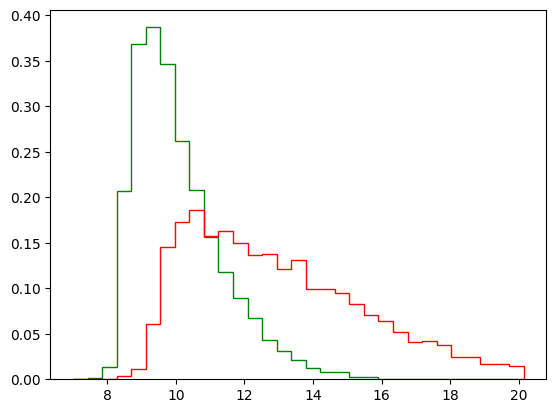

In [ ]:
_, bins, _ = plt.hist(gfluxes.log().numpy(), bins=31, color='g', histtype='step', density=True)
plt.hist(sfluxes.log().numpy(), bins=bins, color='r', histtype='step', density=True)

# fluxes = 10**(0.4 * (30 - all_star_mags))
# plt.hist(fluxes.log(), bins=bins, density=True, color='b', histtype='step')


In [ ]:
all_star_mags.shape, catsim_table['i_ab'].shape

(torch.Size([20667]), (858502,))

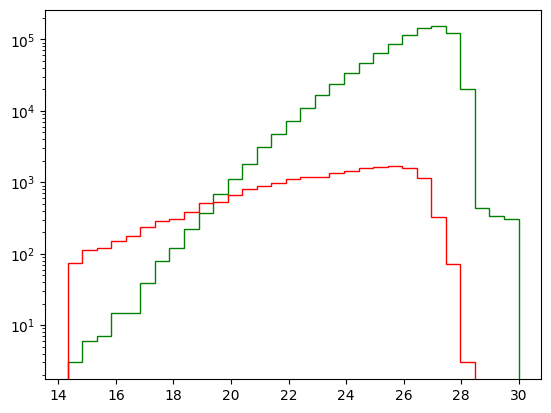

In [ ]:
_, bins, _ = plt.hist(catsim_table['i_ab'], bins=31, color='g', histtype='step')
plt.hist(all_star_mags, bins=bins, color='r', histtype='step')
plt.yscale('log')